# Final Project
*Simon Nørregaard Jeppesen, 201407367*

## Visualizing euler angles and quaternions using Vpython

### Contents 
1. Introduction
2. Receiving data from Arduino in Python
3. Vpython
4. Dynamic visualization in Vpython
5. Quaternions
6. Discussion

#### 1. Introduction
The Arduino Nano is a small microcontroller capable of handling inputs and outputs from various sensors and components. In this project an Arduino Nano is connected to the BNO055 sensor. The BNO055 is an absolute orientation sensor with 9 degrees of freedom (DOF) containing 3 gyroscopes, 3 accelerometers and 3 magnetometers. The combination of the above 9 degrees of freedom allows for accurate orientation estimation of any small project be it a quadcopter, a model rocket or any other configuration in need of attitude estimation. 

The Arduino Nano is programmed in the Arduino IDE which is a development platform using the C++ programming language. The Arduino IDE does not however posses anywhere near the options for data visualization as does Python. Hence the data will be passed from the BNO055 sensor to the Arduino, and from the Arduino to Python where the data will be analyzed. 

Once the data has been analyzed the visualization part of the project revolves around comparing Euler Angles (*pitch, yaw and roll*) to the more complex but computationally advantageous *quaternions* in Vpython.
Below is the physical setup of the project. With the BNO055 on the left hand side and the Arduino on the right. 

<img src="setup_breadboard.png">

#### 2. Receiving data from Arduino in Python
In order for Python to communicate with the Arduino a few libraries need to be installed. 
Arduino passes data through the COM-port selected in the Arduino IDE. The Python library *pyserial* allows for serial communication between the Arduino COM-port and Python. Pyserial is installed using:
*'pip install pyserial'*.
The following code displays a simple example whereby data is passed from the Arduino to Python.

In [ ]:
import serial

import time 

# Display is specific for jupyter, the print() function works just as well.

from IPython.display import display


# The .Serial command takes two arguments, the COM port and the BAUD rate set in Arduino.
# The BAUD rate is the speed of communication between the serial port and Arduino.
# Create variable containing data passed from Arduino.

nano_data = serial.Serial('com3', 9600)

# The serial communication between the Arduino and Python takes a few seconds to establish
# Hence a delay is used using the 'time' library.

time.sleep(5)

# Receiving the data

while True:    
    
    # The inWaiting() function gets the number of byes in the input buffer
    
    while nano_data.inWaiting() == 0:
        pass    
    
    # Reads a '\n' terminated line, see Arduino IDE code for example. 
    
    data       = nano_data.readline()
    
    # Formats the input so as easier to handle
    
    data       = str(data , 'utf-8')
    
    # Data is split into two variables. 
    
    data_split = data.split(',')
    Variable_1 = float(data_split[0])
    Variable_2 = float(data_split[1])
    #display('Variable_1 = {}' ' Variable_2 = {}'.format(Variable_1,Variable_2))

# The output is displayed below. 


<img src="variable_1_2.png">


#### The above example uses the following code written in the Arduino IDE (C++ shell):
The code simply creates 2 variables and increments Variable_1 by 1 and Variable_2 by 0.5 through each loop. Throughout the rest of the project i have omitted the Arduino IDE code, the below is merely to illustrate the structure of such programs. 

In [ ]:
//Declaring variables
int   var1 = 0;
float var2 = 0; 
// The setup() function runs once upon start up of the Arduino
void setup() {
//Begin serial communication with port 'COM3'.
  Serial.begin(9600);
}
//The loop() function runs indefinitely
void loop() {
  var1 += 1;
  var2 += 0.5;
  delay(100);
  //Below is the data printed to the serial-port, this is received in Python.
  Serial.print(var1);
  Serial.print(",");
  Serial.println(var2);
}

#### Receiving data from the BNO055
The following piece of code receives data from the BNO055 sensor which will later be used in the visualization part of the project. The code for the BNO055 written in the Arduino IDE can be found using this link:
https://drive.google.com/drive/folders/1j0q1QCYiOWGtrPhWu92Y0lrDNFtpTV70?usp=sharing. All of the code used to establish communication with the BNO055 and achieve angle outputs HAVE NOT been done by me (this is the Arduino IDE code used on the sensor). The sensor data is stored as a single string containing calibration values and the actual angles of the board. 
I have however written a program for a different sensor (the MPU6050) from the ground up this can also be found in the Google Drive should you be interested (but is not intended as part of this project). 

In [ ]:
# The BAUD rate is changed to 115200 to speed up communication

nano_data = serial.Serial('com3' , 115200)

time.sleep(5)

while True: 
    while nano_data.inWaiting() == 0:
        pass
    data = nano_data.readline()
    data = str(data , 'utf-8')
    
    data_split = data.split(',')
    
    # The below variables are simply the calibration data (which when calibrated have a value of 3)
    # and the actual angle from the BNO055
    
    Accel_cal  = float(data_split[0])
    Gyro_cal   = float(data_split[1])
    Mag_cal    = float(data_split[2])
    Sys_cal    = float(data_split[3])
    Pitch_ang  = float(data_split[4])
    Roll_ang   = float(data_split[5])
    Yaw_ang    = float(data_split[6])
    
    print('Accel Calibration = {}' ' Gyro Calibration = {}'\
                     ' Mag Calibration = {}' ' System = {}'\
                     ' Pitch = {}' ' Roll = {}' ' Yaw = {}'\
                      .format(Accel_cal, Gyro_cal, Mag_cal,\
                     Sys_cal, Pitch_ang, Roll_ang, Yaw_ang))
    
# Below the output is printed (this should be viewed in fullscreen mode so as to allow for all the data to be viewed)


As the system has not yet been calibrated (this is achieved through a swinging motion of the breadboard along with certain angle positions) the values for the calibration are 0. The board remains stationary until a yaw is applied as seen in the last lines of the output:
<img src="accel_cal.png">


#### 3. Visual Python
The following section is dedicated to the introduction of Visual Python doing simple demonstrations
that will eventually allow us to visualize the data recieved from the BNO055 in the block of code above. 
Vpython allows for dynamic visualization of data. It allows the user to create custom objects viewable as 3D animations. Some of the most basic functions can create spheres, boxes and more. Each of these functions take additional arguments such as length, width, color etc. When the code is run an interactive window opens allowing the user to rotate the object. Unfortunately this requires for the specific libraries to be installed I have instead embedded videos and images to show this. 

In [ ]:
from vpython import *

import time

# The scene. command establishes the dimensions and background of the scene
# The functionality of the below commands are self evident from their names
scene.caption    = "Breadboard"
scene.background = color.gray(0.8)
scene.width      = scene.height = 800

# One can append to the caption thus allowing for some text formatting

scene.append_to_caption("\n Final Project")

# box(), creates a square box, the additional arguments determine dimensions.
# All the components are placed on the breadboard

breadboard = box(length = 16.3 , width = 5.3 , height = .3 , opacity = 0.8)

# arrow() creates arrows used to represent the coordinate system
# the 'axis' argument constrains the orientiation of the object along the given vector

x_axis = arrow(axis = vector(1,0,0) , length = 3 , pos = vector(0 , 0 , 0) , color = color.blue)
y_axis = arrow(axis = vector(0,1,0) , length = 3 , pos = vector(0 , 0 , 0) , color = color.cyan)
z_axis = arrow(axis = vector(0,0,1) , length = 3 , pos = vector(0 , 0 , 0) , color = color.green)

# We add the arduino and BNO055 sensor to the scene as boxes

arduino = box(length = 4.4 , width = 1.8 , height = .4 , pos = vector(-6 , 0.3 , 0) , color = color.black)
bno055  = box(length = 2.6 , width = 2.0 , height = .2 , pos = vector(-2 , 0.3 , 0) , color = color.blue)



The above code produces this image in the interactive window:
<img src="breadboard.png">

#### Dynamic visualization in Vpython
Now that an object resembling our breadboard has been made, we can dynamically animate the motion of the breadboard. This is achieved using a for loop which through each iteration updates the position of the breadboard. 


In [ ]:
from vpython import *

from time import *

import numpy as np

import math

# Setting up screen size using .range

scene.range = 6
# The below variables are used for conversion later in the code

pi_to_rad   = np.pi/180
deg         = 1/pi_to_rad

# Changing view of scene

scene.width=scene.height=800

x_axis = arrow(length = 4 , shaftwidth = .1 , color = color.green , axis = vector(1 , 0 , 0))
y_axis = arrow(length = 4 , shaftwidth = .1 , color = color.cyan ,  axis = vector(0 , 1 , 0))
z_axis = arrow(length = 4 , shaftwidth = .1 , color = color.red ,   axis = vector(0 , 0 , 1))

# We now wish to establish the coordinate system for the breadboard

rot_x = arrow(length = 3, shaftwidth = .2 , color = color.magenta , axis = vector(1 , 0 , 0))
rot_y = arrow(length = 3, shaftwidth = .2 , color = color.orange ,  axis = vector(0 , 1 , 0))
rot_z = arrow(length = 3, shaftwidth = .2 , color = color.yellow ,  axis = vector(0 , 0 , 1))

breadboard = box(length = 16.3 , width = 5.3 , height = .3 , opacity = 0.8)
arduino    = box(length = 4.4 ,  width = 1.8 , height = .4 , pos     = vector(-6 , 0.3 , 0) , color = color.yellow)
bno055     = box(length = 2.6 ,  width = 2.0 , height = .2 , pos     = vector(-2 , 0.3 , 0) , color = color.blue)

# We make a compound object instead of having 3 seperate ones.

IMU = compound([breadboard,arduino,bno055])

# IMU stands for Intertial Measurement Unit.

while True:
    # We start by changing the yaw of the breadboard at a constant 35 degrees pitch.
    
    pitch_ang = 35*pi_to_rad
    
    # Dynamic visualization can be achieved in Vpython using a for-loop
    # thus changing the position of the board through each loop

    for yaw_ang in np.arange(0 , 2*np.pi , 0.2):
        
        # Anytime we animate in Vpython we need to set a rate using rate()
        # this is essentially the speed of the animation (too high a rate results in jitters)
        
        rate(10)
        
        # Defining a vector using the spherical to cartesian convention stated above
        # this vector contains the cartesian coordinates of the vector pointing 
        # along the x-axis of the BNO055 sensor. 
        
        x_tip = vector(cos(yaw_ang)*cos(pitch_ang), sin(pitch_ang),\
                                        sin(yaw_ang)*cos(pitch_ang))
        
        # When animating the other vectors instead of deriving the vector as
        # we did for pitch we instead make use of the cross product since x_tip has already been defined.
        
        y_tip = cross(x_tip , vector(0 , 1 , 0))
        z_tip = cross(y_tip , x_tip)
        
        # We now constrain the variables along the axes of rotation
        
        rot_x.axis = x_tip
        rot_y.axis = y_tip
        rot_z.axis = z_tip
        
        # Lengths need to be reset through each loop
        
        rot_x.length = 3
        rot_y.length = 3
        rot_z.length = 3
        
        # Now that the arrows rotate we want our IMU-object to follow the vectors
        # We can choose any of the axes using .axis argument
        
        IMU.axis = x_tip
        
        # This animation rotates the breadboard along the x_tip vector as can be seen
        # in the below video. 


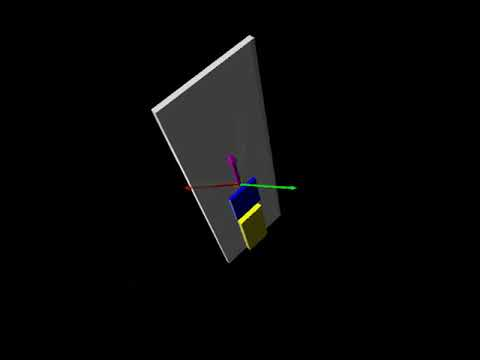

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('McjyeFiqnwU', width=800, height=500)
# https://www.youtube.com/watch?time_continue=15&v=McjyeFiqnwU&feature=emb_title

In order for the breadboard to move to a desired location using the angles received from the BNO055 (yaw, pitch and roll) we need to convert from spherical coordinates to cartesian coordinates as this is the default input used in Vpython. The cartesian coordinates can be calculated simply using: 
<img src="spherical_coordinates.png">

Using the data receiving program from above we can animate the motion of the breadboard in real time using Vpython. 
(Some of the below code is repeated from the above section in order to make the simulation work in Jupyter)
By defining one of our vectors using the above convention we can find the others simply by using cross products. 


In [ ]:
# This part has not been commented as most is repeated from above

from vpython import *

from time import *

import numpy as np

import math

import serial

nano_data = serial.Serial('com3' , 115200)
sleep(5)
data = nano_data.readline()

scene.range = 6
scene.width=scene.height=800

pi_to_rad  = np.pi/180
deg = 1/pi_to_rad

x_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.green ,   axis = vector(1 , 0 , 0))
y_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.cyan ,    axis = vector(0 , 1 , 0))
z_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.red ,     axis = vector(0 , 0 , 1))
rot_x   = arrow(length  = 3, shaftwidth = .2,    color = color.magenta , axis = vector(1 , 0 , 0))
rot_y   = arrow(length  = 3, shaftwidth = .2,    color = color.orange ,  axis = vector(0 , 1 , 0))
rot_z   = arrow(length  = 3, shaftwidth = .2,    color = color.yellow ,  axis = vector(0 , 0 , 1))

arduino = box(length    = 4.4 ,   width = 1.8 , height = .4 , pos = vector(-6 , 0.3 , 0) , color = color.yellow)
bno055  = box(length    = 2.6,    width = 2 ,   height = .2 , pos = vector(-2 , 0.3 , 0) , color = color.blue)

breadboard = box(length = 16.3 ,  width = 5.3 , height = .3 , opacity = 0.8)

IMU        = compound([breadboard,arduino,bno055])

while True:
       while nano_data.inWaiting() == 0:
            pass
       data = nano_data.readline()
       data = str(data , 'utf-8')
       data_split = data.split(',')
       roll_ang   = float(data_split[0])*pi_to_rad
       pitch_ang  = float(data_split[1])*pi_to_rad
       yaw_ang    = float(data_split[2])*pi_to_rad+np.pi
       rate(100) 
    
       x_tip = vector(cos(yaw_ang)*cos(pitch_ang) , sin(pitch_ang),\
                                        sin(yaw_ang)*cos(pitch_ang))
       y_tip = cross(x_tip , vector(0 , 1 , 0))
       z_tip = cross(y_tip , x_tip)
        
       roll_vec   = z_tip*cos(roll_ang)+cross(x_tip , z_tip)*sin(roll_ang)
       rot_x.axis = x_tip
       rot_y.axis = cross(x_tip , roll_vec)
       rot_z.axis = roll_vec
        
       rot_x.length = 3
       rot_y.length = 3
       rot_z.length = 3
    
       IMU.axis = x_tip
        
       # This time constraining the z-axis using the .up attribute
       # this much like the axis argument orients the IMU along the scene 'up' orientation
        
       IMU.up   = roll_vec
    
       print(pitch_ang , roll_ang , yaw_ang)


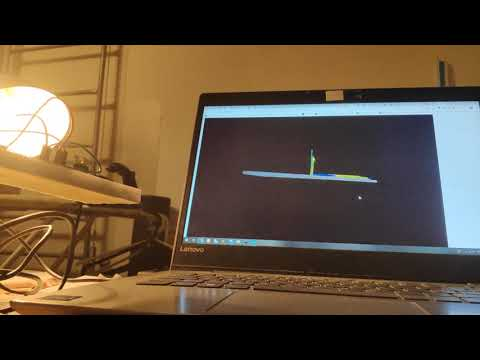

In [8]:
YouTubeVideo('jjviD0kUSxg', width=800, height=500)
# https://www.youtube.com/watch?time_continue=34&v=jjviD0kUSxg&feature=emb_title

#### Quaternions
Quaternions is another orientation formalism widely used and has the distinct advantage of avoiding gimbal lock. More so a given orientation achieved via Euler Angles is ambigiuous in the sense that a given pitch for the vehicle can be achieved in multiple ways. One way is simply to pitch to the angle, but another way is through a combination of roll and yaw. Quaternions are does not face this problem of ambiguity. 
Quaternions are four element vectors composed of 3 imaginary numbers and 1 real number. Fortunately the BNO055 comes readily equipped with quaternion algorithims allowing us to grab the data in quaternion form. The code using quaternions in Python is very similar to Euler Angles, except now we're not passing roll, pitch and yaw but the quaternions: quat_1, quat_2, quat_3 and quat_4. The data is still being passed through the COM-port as in the previous examples but now as quaternions. However visualizing a vector with 3 imaginary parts is not easy in 3D euclidean space, we thus need to convert the quaternions back to Euler Angles before we can actually visualize them. The conversion can be seen in the image below. 

<img src="quat_to_euler.png">


In [ ]:
# This part has not been commented as most is repeated from above
# ----------------------------------------------------------------------------------------------- #
from vpython import *

from time import *

import numpy as np

import math

import serial

nano_data = serial.Serial('com3' , 115200)
sleep(5)
data = nano_data.readline()

scene.range = 6
scene.width = scene.height=800

pi_to_rad  = np.pi/180
deg        = 1/pi_to_rad

x_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.green ,   axis = vector(1 , 0 , 0))
y_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.cyan ,    axis = vector(0 , 1 , 0))
z_axis  = arrow(length  = 4, shaftwidth = .1,    color = color.red ,     axis = vector(0 , 0 , 1))
rot_x   = arrow(length  = 3, shaftwidth = .2,    color = color.magenta , axis = vector(1 , 0 , 0))
rot_y   = arrow(length  = 3, shaftwidth = .2,    color = color.orange ,  axis = vector(0 , 1 , 0))
rot_z   = arrow(length  = 3, shaftwidth = .2,    color = color.yellow ,  axis = vector(0 , 0 , 1))

arduino = box(length    = 4.4 ,   width = 1.8 , height = .4 , pos = vector(-6 , 0.3 , 0) , color = color.yellow)
bno055  = box(length    = 2.6 ,   width = 2 ,   height = .2 , pos = vector(-2 , 0.3 , 0) , color = color.blue)

breadboard = box(length = 16.3 ,  width = 5.3 , height = .3 , opacity = 0.8)

IMU        = compound([breadboard , arduino,bno055])

while True:
       while nano_data.inWaiting() == 0:
            pass
       data = nano_data.readline()
       data = str(data , 'utf-8')
       data_split = data.split(',')
    
# ----------------------------------------------------------------------------------------------- #   
      
    
       # Renaming variables (yaw, pitch and roll) to quaternions.
        
       quat_0 = float(splitPacket([0]))
       quat_1 = float(splitPacket([1]))
       quat_2 = float(splitPacket([2]))
       quat_3 = float(splitPacket([3]))
        
       # We now need to convert back to Euler Angles using the conversion formulas stated above
              
       roll_ang   = atan2(2*(quat_0*quat_1+quat_2*quat_3) , 1-2*(quat_1*quat_1+quat_2*quat_2))       
       pitch_ang  = asin(2*(quat_0*quat_2-quat_3*quat_1))
       yaw_ang    = atan2(2*(quat_0*quat_3+quat_1*quat_2) , 1-2*(quat_2*quat_2+quat_3*quat_3))
       
       rate(100) 
    
       x_tip = vector(cos(yaw_ang)*cos(pitch_ang) , sin(pitch_ang),\
                                        sin(yaw_ang)*cos(pitch_ang))
       y_tip = cross(x_tip , vector(0,1,0))
       z_tip = cross(y_tip , x_tip)
        
       roll_vec   = z_tip*cos(roll_ang)+cross(x_tip , z_tip)*sin(roll_ang)
       rot_x.axis = x_tip
       rot_y.axis = cross(x_tip , roll_vec)
       rot_z.axis = roll_vec
        
       rot_x.length = 3
       rot_y.length = 3
       rot_z.length = 3
    
       IMU.axis = x_tip
        
       # This time constraining the z-axis using the .up attribute
       # this much like the axis argument orients the IMU along the 'up' orientation of the scene
        
       IMU.up   = roll_vec
    
       print(pitch_ang , roll_ang , yaw_ang)
        
       # Finally the desired output turns out to be far more stable
       # (visual judgment only, no qualitative comparison made this time)
       # The video below shows the output using quaternions. 


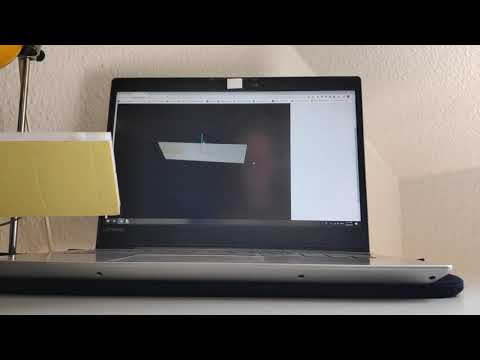

In [10]:
YouTubeVideo('bZqSBYOXaNY', width=800, height=500)
# https://www.youtube.com/watch?v=bZqSBYOXaNY

#### Discussion
Using Python to analyze data compared to the Arduino IDE allows for data-manipulation and visualization. The Visual Python library is a great tool for rudimentary animation and real time dynamic visualization. When structuring this project it was important for me to show the basics of Vpython before advancing to the dynamics. This project entails a lot of information not described here, which might make the project hard to read as a stand alone. Looking back this might've been too ambitious a task and for someone not in possession of the hardware it might be hard to relate to the individual steps and why they were carried out the way they were. I decided to include videos as an explanatory means to compensate for the otherwise interactive environment of Vpython. 

Furhter development of this project should include a more rigorous comparisson of Euler Angles and quaternions. Even though visually one can see the difference this is not the optimal way of comparing the two formalisms. Developing this project has given a new dimension to Python programming for me. It enables the user to actively interact with a real world system and see the necessity of Python compared to the Arduino IDE. Even though the project does not include advanced algorithms it has been a great learning experience. 
